In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv("datasets\BostonHousing (1).csv")

In [5]:
dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### dependent feature and independent features

In [6]:
x = dataset.iloc[:,0:-1]
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [14]:
y = dataset.iloc[:,-1]
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

## train test split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=.30, random_state= 42)

5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: medv, Length: 354, dtype: float64

### standardizing the datasets

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [21]:
scaler = StandardScaler()

In [22]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
model = LinearRegression().fit(x_train, y_train)

In [26]:
predictions = model.predict(x_test)

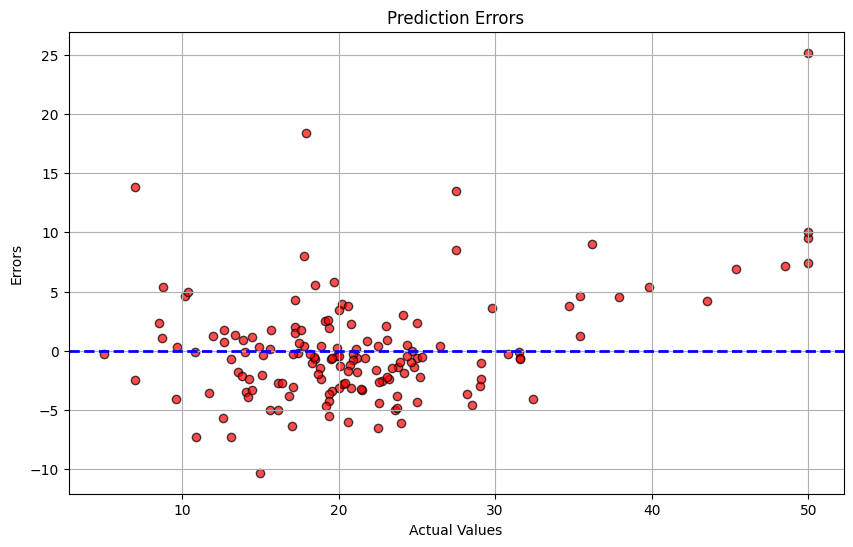

In [31]:
# Calculate errors
errors = y_test - predictions

# Plot prediction errors
plt.figure(figsize=(10, 6))
plt.scatter(y_test, errors, color='red', edgecolors='k', alpha=0.7)
plt.axhline(y=0, color='blue', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Errors')
plt.title('Prediction Errors')
plt.grid(True)
plt.show()

### Accuracy prediction

In [35]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Mean Squared Error: 21.52
Mean Absolute Error: 3.16
R^2 Score: 0.71


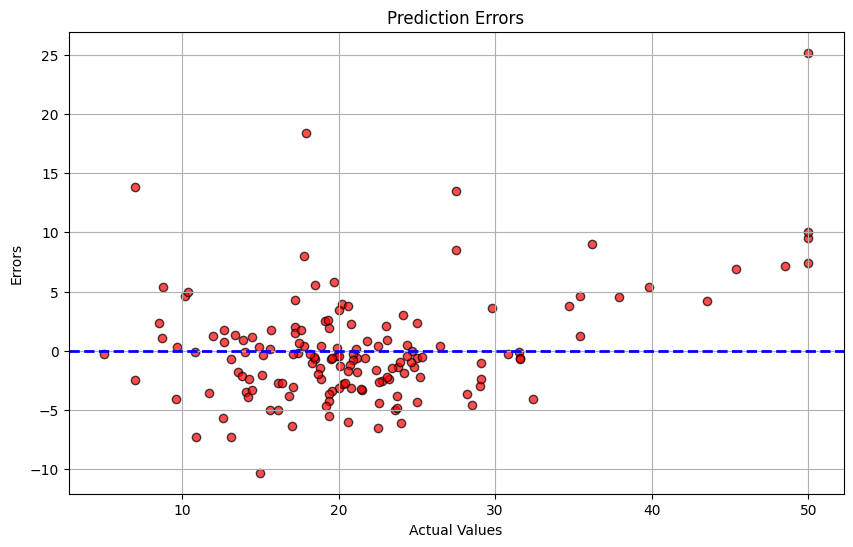

In [36]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Plotting prediction errors
errors = y_test - predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, errors, color='red', edgecolors='k', alpha=0.7)
plt.axhline(y=0, color='blue', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Errors')
plt.title('Prediction Errors')
plt.grid(True)
plt.show()